In [2]:
import re
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def parse_output_file(filename, target_detuning):
    with open(filename, 'r') as f:
        lines = f.readlines()

    data = []
    # pattern = re.compile(r'results/cooling_sim_d(\d+\.\d+).*?s(\d+\.\d+)s(\d+\.\d+)\.jl')
    pattern = re.compile(r'results/cooling_sim_d(\d+\.\d+).*?s(\d+\.\d+)s(\d+\.\d+)t(\d+\.\d+)\.jl')
    i = 0

    while i < len(lines):
        match = pattern.search(lines[i])
        if match:
            detuning, s1, s2, t = map(float, match.groups())
            if int(detuning) == target_detuning:
                entry = {
                    's1': s1,
                    's2': s2,
                    'Temperature': float(lines[i+1].split(':')[1].strip().split()[0]),
                    'Scattering rate': float(lines[i+2].split(':')[1].strip().replace('e+','E')),
                    'p_survival': float(lines[i+3].split(':')[1].strip()),
                    'Scattering rate over log p_survival': float(lines[i+4].split(':')[1].strip().replace('e+','E')),
                    'Diffusion constant (1e-3)': float(lines[i+5].split(':')[1].strip().replace('e+','E').replace('e-','E-'))
                }
                data.append(entry)
            i += 5
        else:
            i += 1
    return data

def create_heatmap(data, quantity, detuning):
    s1_vals = sorted(set(d['s1'] for d in data))
    s2_vals = sorted(set(d['s2'] for d in data))

    heatmap = np.full((len(s2_vals), len(s1_vals)), np.nan)

    s1_idx = {val: idx for idx, val in enumerate(s1_vals)}
    s2_idx = {val: idx for idx, val in enumerate(s2_vals)}

    for entry in data:
        i = s2_idx[entry['s2']]
        j = s1_idx[entry['s1']]
        heatmap[i][j] = entry[quantity]

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, xticklabels=s1_vals, yticklabels=s2_vals, annot=True, fmt=".2g", cmap="bone")
    plt.title(f'{quantity} Heatmap at {detuning} MHz Detuning')
    plt.xlabel('s1')
    plt.ylabel('s2')
    plt.tight_layout()
    plt.show()


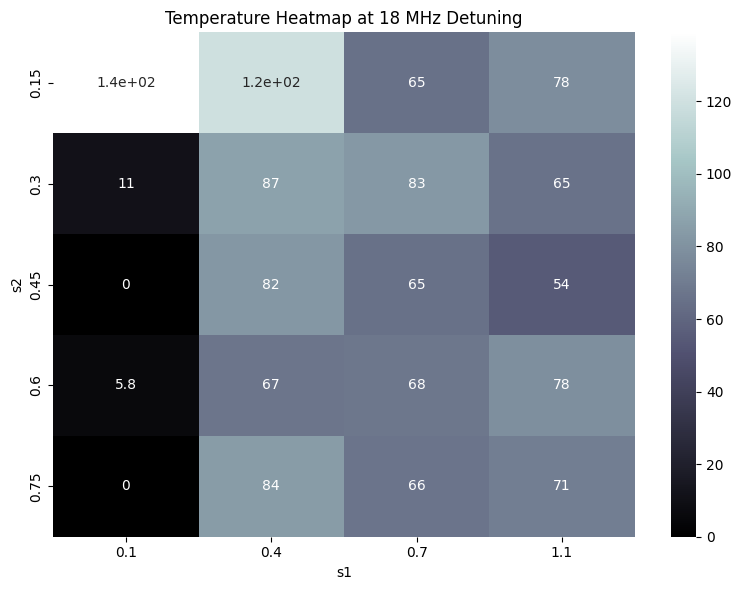

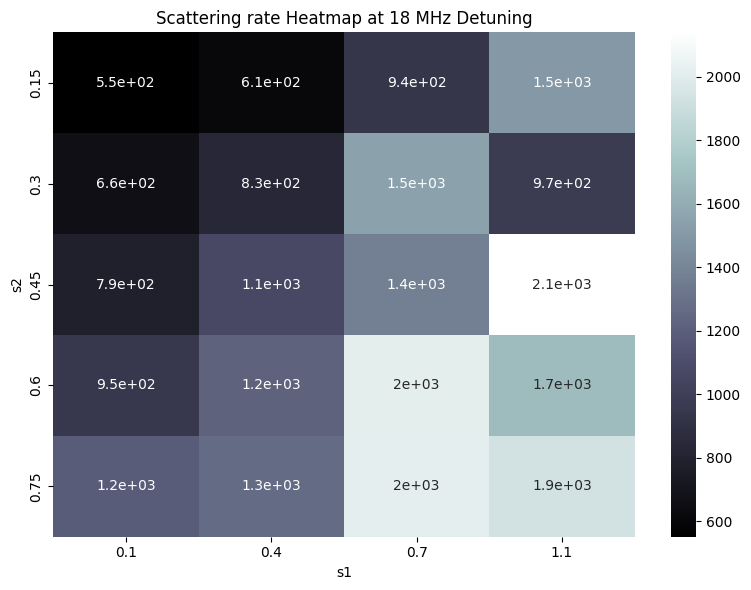

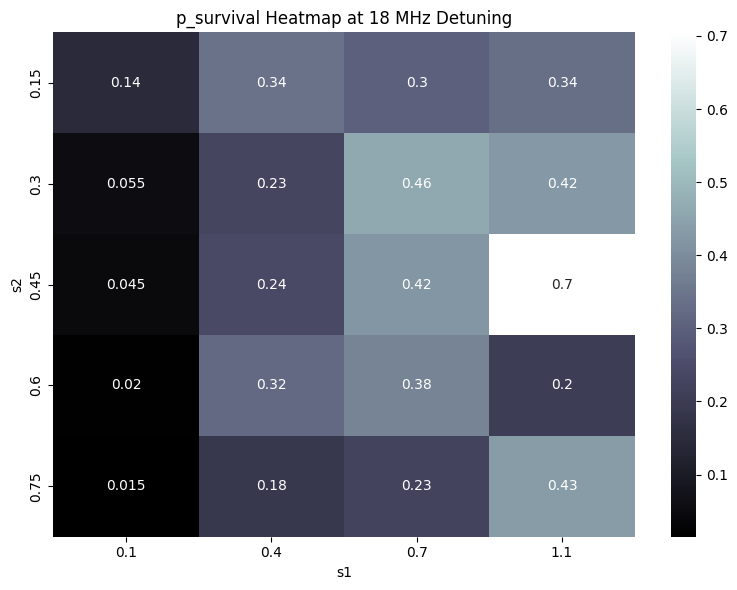

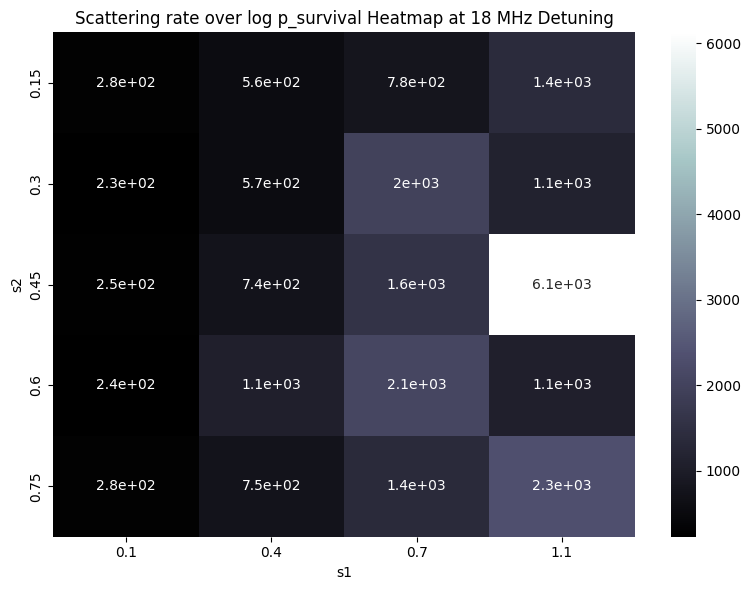

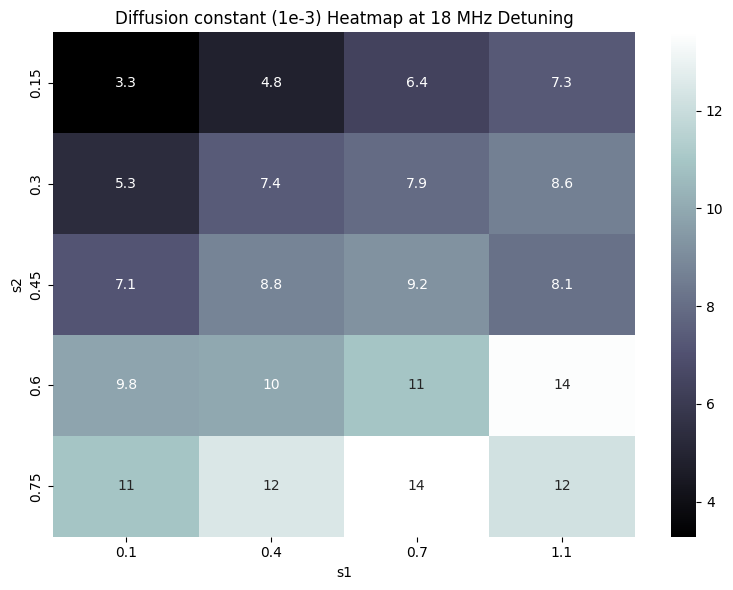

In [ ]:
detuning = 32
filename = "output.txt"

data = parse_output_file(filename, detuning)

if not data:
    print(f"No data found for detuning {detuning} MHz")
else:
    for quantity in ['Temperature', 'Scattering rate', 'p_survival', 'Scattering rate over log p_survival', 'Diffusion constant (1e-3)']:
        create_heatmap(data, quantity, detuning)
